In [1]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen
from matplotlib import pyplot as plt

In [2]:
# Poland vs Argentina
MATCH_ID = 3857264
TEAM = 'Poland'

parser = Sbopen()
event, related, freeze, tactics = parser.event(MATCH_ID)

# starting players from Barcelona
starting_xi_event = event.loc[((event['type_name'] == 'Starting XI') &
                               (event['team_name'] == TEAM)), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')
event = event.loc[((event['type_name'] == 'Ball Receipt') &
                   (event['outcome_name'].isnull()) &
                   (event['player_id'].isin(starting_xi['player_id']))
                   ), ['player_id', 'x', 'y']]
# merge on the starting positions to the events
event = event.merge(starting_xi, on='player_id')
formation = event['tactics_formation'].iloc[0]

In [7]:
starting_xi

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id,tactics_formation
0,1,3857264,bad01947-5491-406e-bbe9-2a146161aa70,5669,Wojciech Szczęsny,1,Goalkeeper,1,442
1,2,3857264,bad01947-5491-406e-bbe9-2a146161aa70,4734,Matty Cash,2,Right Back,2,442
2,15,3857264,bad01947-5491-406e-bbe9-2a146161aa70,3034,Kamil Glik,3,Right Center Back,3,442
3,14,3857264,bad01947-5491-406e-bbe9-2a146161aa70,44166,Jakub Piotr Kiwior,5,Left Center Back,4,442
4,18,3857264,bad01947-5491-406e-bbe9-2a146161aa70,5673,Bartosz Bereszyński,6,Left Back,5,442
5,6,3857264,bad01947-5491-406e-bbe9-2a146161aa70,11737,Krystian Bielik,9,Right Defensive Midfield,6,442
6,10,3857264,bad01947-5491-406e-bbe9-2a146161aa70,3637,Grzegorz Krychowiak,11,Left Defensive Midfield,7,442
7,20,3857264,bad01947-5491-406e-bbe9-2a146161aa70,5660,Piotr Zieliński,12,Right Midfield,8,442
8,24,3857264,bad01947-5491-406e-bbe9-2a146161aa70,7979,Przemysław Frankowski,16,Left Midfield,9,442
9,9,3857264,bad01947-5491-406e-bbe9-2a146161aa70,5668,Robert Lewandowski,22,Right Center Forward,10,442


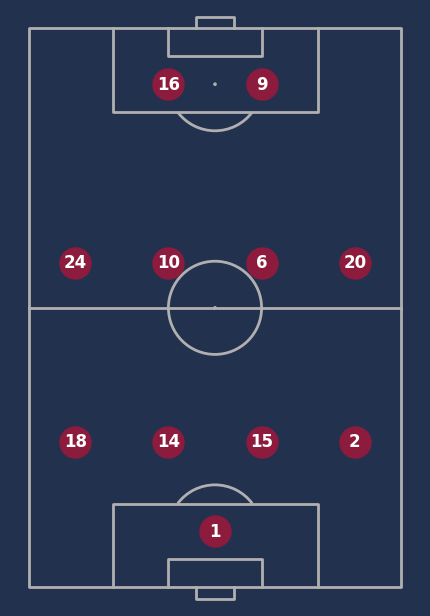

In [15]:
pitch = VerticalPitch(goal_type='box', pitch_color= '#22314E')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
ax_text = pitch.formation(formation, 
                          positions=starting_xi.position_id, 
                          kind='text',
                          text=starting_xi.jersey_number,
                          va='center', 
                          ha='center', 
                          fontsize=12, 
                          ax=ax,
                          color = 'white',
                          fontdict=None,
                          weight='bold')

fig.set_facecolor('#22314E')

ax_scatter = pitch.formation(formation, 
                             positions=starting_xi.position_id, 
                             kind='scatter',
                             c='#8D1B3D',
                             s=500,
                             #xoffset=0,
                             #yoffset = 0,
                             ax=ax)

plt.savefig('Images/formation_World_Cup.png')